In [12]:
import h5py
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np

from depth_h5py_gen import *

%load_ext autoreload
%autoreload 2

def find_broken_datasets(file_path):
    broken_datasets = []

    # Open the HDF5 file
    with h5py.File(file_path, 'r') as hdf_file:
        # Recursive function to check groups
        def check_groups(group):
            # Collect group keys only (not datasets)
            group_keys = [key for key, item in group.items() if isinstance(item, h5py.Group)]
            with tqdm(total=len(group_keys), desc=f"Checking group {group.name}", unit="group") as pbar:
                for name, item in group.items():
                    if isinstance(item, h5py.Dataset):  # Check if it's a dataset
                        # Check for missing attributes
                        if 'min' not in item.attrs or 'range' not in item.attrs:
                            broken_datasets.append(item.name)
                    elif isinstance(item, h5py.Group):  # Recurse into groups
                        pbar.update(1)
                        check_groups(item)  # Recursive call for the subgroup

        # Start checking from the root group
        check_groups(hdf_file)

    return broken_datasets

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
hdf5_path = ['D:/dev/lama_stereoinpainting/docker/places/depth/train_large_places365standard_disparity_u8.hdf5',
             'D:/dev/lama_stereoinpainting/docker/places/depth/val_large_places365standard_disparity_u8.hdf5',]

broken_datasets = []
for path in hdf5_path:
    broken = find_broken_datasets(path)
    broken_datasets.append(broken)

    if broken:
        print(f"Broken datasets in {path}:")
        for dataset in broken:
            print(dataset)
    else:
        print(f"All datasets in {path} 'min' and 'range' attributes.")

Checking group /:   0%|          | 0/1 [00:00<?, ?group/s]

Checking group /data_large:   0%|          | 0/24 [00:00<?, ?group/s]

Checking group /data_large/a:   0%|          | 0/28 [00:00<?, ?group/s]

Checking group /data_large/a/airfield: 0group [00:00, ?group/s]

Checking group /data_large/a/airplane_cabin: 0group [00:00, ?group/s]

Checking group /data_large/a/airport_terminal: 0group [00:00, ?group/s]

Checking group /data_large/a/alcove: 0group [00:00, ?group/s]

Checking group /data_large/a/alley: 0group [00:00, ?group/s]

Checking group /data_large/a/amphitheater: 0group [00:00, ?group/s]

Checking group /data_large/a/amusement_arcade: 0group [00:00, ?group/s]

Checking group /data_large/a/amusement_park: 0group [00:00, ?group/s]

Checking group /data_large/a/apartment_building:   0%|          | 0/1 [00:00<?, ?group/s]

Checking group /data_large/a/apartment_building/outdoor: 0group [00:00, ?group/s]

Checking group /data_large/a/aquarium: 0group [00:00, ?group/s]

Checking group /data_large/a/aqueduct: 0group [00:00, ?group/s]

Checking group /data_large/a/arcade: 0group [00:00, ?group/s]

Checking group /data_large/a/arch: 0group [00:00, ?group/s]

Checking group /data_large/a/archaelogical_excavation: 0group [00:00, ?group/s]

Checking group /data_large/a/archive: 0group [00:00, ?group/s]

Checking group /data_large/a/arena:   0%|          | 0/3 [00:00<?, ?group/s]

Checking group /data_large/a/arena/hockey: 0group [00:00, ?group/s]

Checking group /data_large/a/arena/performance: 0group [00:00, ?group/s]

Checking group /data_large/a/arena/rodeo: 0group [00:00, ?group/s]

Checking group /data_large/a/army_base: 0group [00:00, ?group/s]

Checking group /data_large/a/art_gallery: 0group [00:00, ?group/s]

Checking group /data_large/a/art_school: 0group [00:00, ?group/s]

Checking group /data_large/a/art_studio: 0group [00:00, ?group/s]

Checking group /data_large/a/artists_loft: 0group [00:00, ?group/s]

Checking group /data_large/a/assembly_line: 0group [00:00, ?group/s]

Checking group /data_large/a/athletic_field:   0%|          | 0/1 [00:00<?, ?group/s]

Checking group /data_large/a/athletic_field/outdoor: 0group [00:00, ?group/s]

Checking group /data_large/a/atrium:   0%|          | 0/1 [00:00<?, ?group/s]

Checking group /data_large/a/atrium/public: 0group [00:00, ?group/s]

Checking group /data_large/a/attic: 0group [00:00, ?group/s]

Checking group /data_large/a/auditorium: 0group [00:00, ?group/s]

Checking group /data_large/a/auto_factory: 0group [00:00, ?group/s]

Checking group /data_large/a/auto_showroom: 0group [00:00, ?group/s]

Checking group /data_large/b:   0%|          | 0/42 [00:00<?, ?group/s]

Checking group /data_large/b/badlands: 0group [00:00, ?group/s]

Checking group /data_large/b/bakery:   0%|          | 0/1 [00:00<?, ?group/s]

Checking group /data_large/b/bakery/shop: 0group [00:00, ?group/s]

Checking group /data_large/b/balcony:   0%|          | 0/2 [00:00<?, ?group/s]

Checking group /data_large/b/balcony/exterior: 0group [00:00, ?group/s]

Checking group /data_large/b/balcony/interior: 0group [00:00, ?group/s]

Checking group /data_large/b/ball_pit: 0group [00:00, ?group/s]

Checking group /data_large/b/ballroom: 0group [00:00, ?group/s]

Checking group /data_large/b/bamboo_forest: 0group [00:00, ?group/s]

Checking group /data_large/b/bank_vault: 0group [00:00, ?group/s]

Checking group /data_large/b/banquet_hall: 0group [00:00, ?group/s]

Checking group /data_large/b/bar: 0group [00:00, ?group/s]

Checking group /data_large/b/barn: 0group [00:00, ?group/s]

Checking group /data_large/b/barndoor: 0group [00:00, ?group/s]

Checking group /data_large/b/baseball_field: 0group [00:00, ?group/s]

Checking group /data_large/b/basement: 0group [00:00, ?group/s]

Checking group /data_large/b/basketball_court:   0%|          | 0/1 [00:00<?, ?group/s]

Checking group /data_large/b/basketball_court/indoor: 0group [00:00, ?group/s]

Checking group /data_large/b/bathroom: 0group [00:00, ?group/s]

Checking group /data_large/b/bazaar:   0%|          | 0/2 [00:00<?, ?group/s]

Checking group /data_large/b/bazaar/indoor: 0group [00:00, ?group/s]

Checking group /data_large/b/bazaar/outdoor: 0group [00:00, ?group/s]

Checking group /data_large/b/beach: 0group [00:00, ?group/s]

Checking group /data_large/b/beach_house: 0group [00:00, ?group/s]

Checking group /data_large/b/beauty_salon: 0group [00:00, ?group/s]

Checking group /data_large/b/bedchamber: 0group [00:00, ?group/s]

Checking group /data_large/b/bedroom: 0group [00:00, ?group/s]

Checking group /data_large/b/beer_garden: 0group [00:00, ?group/s]

Checking group /data_large/b/beer_hall: 0group [00:00, ?group/s]

Checking group /data_large/b/berth: 0group [00:00, ?group/s]

Checking group /data_large/b/biology_laboratory: 0group [00:00, ?group/s]

Checking group /data_large/b/boardwalk: 0group [00:00, ?group/s]

Checking group /data_large/b/boat_deck: 0group [00:00, ?group/s]

Checking group /data_large/b/boathouse: 0group [00:00, ?group/s]

Checking group /data_large/b/bookstore: 0group [00:00, ?group/s]

Checking group /data_large/b/booth:   0%|          | 0/1 [00:00<?, ?group/s]

Checking group /data_large/b/booth/indoor: 0group [00:00, ?group/s]

Checking group /data_large/b/botanical_garden: 0group [00:00, ?group/s]

Checking group /data_large/b/bow_window:   0%|          | 0/1 [00:00<?, ?group/s]

Checking group /data_large/b/bow_window/indoor: 0group [00:00, ?group/s]

Checking group /data_large/b/bowling_alley: 0group [00:00, ?group/s]

Checking group /data_large/b/boxing_ring: 0group [00:00, ?group/s]

Checking group /data_large/b/bridge: 0group [00:00, ?group/s]

Checking group /data_large/b/building_facade: 0group [00:00, ?group/s]

Checking group /data_large/b/bullring: 0group [00:00, ?group/s]

Checking group /data_large/b/burial_chamber: 0group [00:00, ?group/s]

Checking group /data_large/b/bus_interior: 0group [00:00, ?group/s]

Checking group /data_large/b/bus_station:   0%|          | 0/1 [00:00<?, ?group/s]

Checking group /data_large/b/bus_station/indoor: 0group [00:00, ?group/s]

Checking group /data_large/b/butchers_shop: 0group [00:00, ?group/s]

Checking group /data_large/b/butte: 0group [00:00, ?group/s]

Checking group /data_large/c:   0%|          | 0/37 [00:00<?, ?group/s]

Checking group /data_large/c/cabin:   0%|          | 0/1 [00:00<?, ?group/s]

Checking group /data_large/c/cabin/outdoor: 0group [00:00, ?group/s]

Checking group /data_large/c/cafeteria: 0group [00:00, ?group/s]

Checking group /data_large/c/campsite: 0group [00:00, ?group/s]

Checking group /data_large/c/campus: 0group [00:00, ?group/s]

Checking group /data_large/c/canal:   0%|          | 0/2 [00:00<?, ?group/s]

Checking group /data_large/c/canal/natural: 0group [00:00, ?group/s]

Checking group /data_large/c/canal/urban: 0group [00:00, ?group/s]

Checking group /data_large/c/candy_store: 0group [00:00, ?group/s]

Checking group /data_large/c/canyon: 0group [00:00, ?group/s]

Checking group /data_large/c/car_interior: 0group [00:00, ?group/s]

Checking group /data_large/c/carrousel: 0group [00:00, ?group/s]

Checking group /data_large/c/castle: 0group [00:00, ?group/s]

Checking group /data_large/c/catacomb: 0group [00:00, ?group/s]

Checking group /data_large/c/cemetery: 0group [00:00, ?group/s]

Checking group /data_large/c/chalet: 0group [00:00, ?group/s]

Checking group /data_large/c/chemistry_lab: 0group [00:00, ?group/s]

Checking group /data_large/c/childs_room: 0group [00:00, ?group/s]

Checking group /data_large/c/church:   0%|          | 0/2 [00:00<?, ?group/s]

Checking group /data_large/c/church/indoor: 0group [00:00, ?group/s]

Checking group /data_large/c/church/outdoor: 0group [00:00, ?group/s]

Checking group /data_large/c/classroom: 0group [00:00, ?group/s]

Checking group /data_large/c/clean_room: 0group [00:00, ?group/s]

Checking group /data_large/c/cliff: 0group [00:00, ?group/s]

Checking group /data_large/c/closet: 0group [00:00, ?group/s]

Checking group /data_large/c/clothing_store: 0group [00:00, ?group/s]

Checking group /data_large/c/coast: 0group [00:00, ?group/s]

Checking group /data_large/c/cockpit: 0group [00:00, ?group/s]

Checking group /data_large/c/coffee_shop: 0group [00:00, ?group/s]

Checking group /data_large/c/computer_room: 0group [00:00, ?group/s]

Checking group /data_large/c/conference_center: 0group [00:00, ?group/s]

Checking group /data_large/c/conference_room: 0group [00:00, ?group/s]

Checking group /data_large/c/construction_site: 0group [00:00, ?group/s]

Checking group /data_large/c/corn_field: 0group [00:00, ?group/s]

Checking group /data_large/c/corral: 0group [00:00, ?group/s]

Checking group /data_large/c/corridor: 0group [00:00, ?group/s]

Checking group /data_large/c/cottage: 0group [00:00, ?group/s]

Checking group /data_large/c/courthouse: 0group [00:00, ?group/s]

Checking group /data_large/c/courtyard: 0group [00:00, ?group/s]

Checking group /data_large/c/creek: 0group [00:00, ?group/s]

Checking group /data_large/c/crevasse: 0group [00:00, ?group/s]

Checking group /data_large/c/crosswalk: 0group [00:00, ?group/s]

Checking group /data_large/d:   0%|          | 0/15 [00:00<?, ?group/s]

Checking group /data_large/d/dam: 0group [00:00, ?group/s]

Checking group /data_large/d/delicatessen: 0group [00:00, ?group/s]

Checking group /data_large/d/department_store: 0group [00:00, ?group/s]

Checking group /data_large/d/desert:   0%|          | 0/2 [00:00<?, ?group/s]

Checking group /data_large/d/desert/sand: 0group [00:00, ?group/s]

Checking group /data_large/d/desert/vegetation: 0group [00:00, ?group/s]

Checking group /data_large/d/desert_road: 0group [00:00, ?group/s]

Checking group /data_large/d/diner:   0%|          | 0/1 [00:00<?, ?group/s]

Checking group /data_large/d/diner/outdoor: 0group [00:00, ?group/s]

Checking group /data_large/d/dining_hall: 0group [00:00, ?group/s]

Checking group /data_large/d/dining_room: 0group [00:00, ?group/s]

Checking group /data_large/d/discotheque: 0group [00:00, ?group/s]

Checking group /data_large/d/doorway:   0%|          | 0/1 [00:00<?, ?group/s]

Checking group /data_large/d/doorway/outdoor: 0group [00:00, ?group/s]

Checking group /data_large/d/dorm_room: 0group [00:00, ?group/s]

Checking group /data_large/d/downtown: 0group [00:00, ?group/s]

Checking group /data_large/d/dressing_room: 0group [00:00, ?group/s]

Checking group /data_large/d/driveway: 0group [00:00, ?group/s]

Checking group /data_large/d/drugstore: 0group [00:00, ?group/s]

Checking group /data_large/e:   0%|          | 0/8 [00:00<?, ?group/s]

Checking group /data_large/e/elevator:   0%|          | 0/1 [00:00<?, ?group/s]

Checking group /data_large/e/elevator/door: 0group [00:00, ?group/s]

Checking group /data_large/e/elevator_lobby: 0group [00:00, ?group/s]

Checking group /data_large/e/elevator_shaft: 0group [00:00, ?group/s]

Checking group /data_large/e/embassy: 0group [00:00, ?group/s]

Checking group /data_large/e/engine_room: 0group [00:00, ?group/s]

Checking group /data_large/e/entrance_hall: 0group [00:00, ?group/s]

Checking group /data_large/e/escalator:   0%|          | 0/1 [00:00<?, ?group/s]

Checking group /data_large/e/escalator/indoor: 0group [00:00, ?group/s]

Checking group /data_large/e/excavation: 0group [00:00, ?group/s]

Checking group /data_large/f:   0%|          | 0/17 [00:00<?, ?group/s]

Checking group /data_large/f/fabric_store: 0group [00:00, ?group/s]

Checking group /data_large/f/farm: 0group [00:00, ?group/s]

Checking group /data_large/f/fastfood_restaurant: 0group [00:00, ?group/s]

Checking group /data_large/f/field:   0%|          | 0/2 [00:00<?, ?group/s]

Checking group /data_large/f/field/cultivated: 0group [00:00, ?group/s]

Checking group /data_large/f/field/wild: 0group [00:00, ?group/s]

Checking group /data_large/f/field_road: 0group [00:00, ?group/s]

Checking group /data_large/f/fire_escape: 0group [00:00, ?group/s]

Checking group /data_large/f/fire_station: 0group [00:00, ?group/s]

Checking group /data_large/f/fishpond: 0group [00:00, ?group/s]

Checking group /data_large/f/flea_market:   0%|          | 0/1 [00:00<?, ?group/s]

Checking group /data_large/f/flea_market/indoor: 0group [00:00, ?group/s]

Checking group /data_large/f/florist_shop:   0%|          | 0/1 [00:00<?, ?group/s]

Checking group /data_large/f/florist_shop/indoor: 0group [00:00, ?group/s]

Checking group /data_large/f/food_court: 0group [00:00, ?group/s]

Checking group /data_large/f/football_field: 0group [00:00, ?group/s]

Checking group /data_large/f/forest:   0%|          | 0/1 [00:00<?, ?group/s]

Checking group /data_large/f/forest/broadleaf: 0group [00:00, ?group/s]

Checking group /data_large/f/forest_path: 0group [00:00, ?group/s]

Checking group /data_large/f/forest_road: 0group [00:00, ?group/s]

Checking group /data_large/f/formal_garden: 0group [00:00, ?group/s]

Checking group /data_large/f/fountain: 0group [00:00, ?group/s]

Checking group /data_large/g:   0%|          | 0/11 [00:00<?, ?group/s]

Checking group /data_large/g/galley: 0group [00:00, ?group/s]

Checking group /data_large/g/garage:   0%|          | 0/2 [00:00<?, ?group/s]

Checking group /data_large/g/garage/indoor: 0group [00:00, ?group/s]

Checking group /data_large/g/garage/outdoor: 0group [00:00, ?group/s]

Checking group /data_large/g/gas_station: 0group [00:00, ?group/s]

Checking group /data_large/g/gazebo:   0%|          | 0/1 [00:00<?, ?group/s]

Checking group /data_large/g/gazebo/exterior: 0group [00:00, ?group/s]

Checking group /data_large/g/general_store:   0%|          | 0/2 [00:00<?, ?group/s]

Checking group /data_large/g/general_store/indoor: 0group [00:00, ?group/s]

Checking group /data_large/g/general_store/outdoor: 0group [00:00, ?group/s]

Checking group /data_large/g/gift_shop: 0group [00:00, ?group/s]

Checking group /data_large/g/glacier: 0group [00:00, ?group/s]

Checking group /data_large/g/golf_course: 0group [00:00, ?group/s]

Checking group /data_large/g/greenhouse:   0%|          | 0/2 [00:00<?, ?group/s]

Checking group /data_large/g/greenhouse/indoor: 0group [00:00, ?group/s]

Checking group /data_large/g/greenhouse/outdoor: 0group [00:00, ?group/s]

Checking group /data_large/g/grotto: 0group [00:00, ?group/s]

Checking group /data_large/g/gymnasium:   0%|          | 0/1 [00:00<?, ?group/s]

Checking group /data_large/g/gymnasium/indoor: 0group [00:00, ?group/s]

Checking group /data_large/h:   0%|          | 0/15 [00:00<?, ?group/s]

Checking group /data_large/h/hangar:   0%|          | 0/2 [00:00<?, ?group/s]

Checking group /data_large/h/hangar/indoor: 0group [00:00, ?group/s]

Checking group /data_large/h/hangar/outdoor: 0group [00:00, ?group/s]

Checking group /data_large/h/harbor: 0group [00:00, ?group/s]

Checking group /data_large/h/hardware_store: 0group [00:00, ?group/s]

Checking group /data_large/h/hayfield: 0group [00:00, ?group/s]

Checking group /data_large/h/heliport: 0group [00:00, ?group/s]

Checking group /data_large/h/highway: 0group [00:00, ?group/s]

Checking group /data_large/h/home_office: 0group [00:00, ?group/s]

Checking group /data_large/h/home_theater: 0group [00:00, ?group/s]

Checking group /data_large/h/hospital: 0group [00:00, ?group/s]

Checking group /data_large/h/hospital_room: 0group [00:00, ?group/s]

Checking group /data_large/h/hot_spring: 0group [00:00, ?group/s]

Checking group /data_large/h/hotel:   0%|          | 0/1 [00:00<?, ?group/s]

Checking group /data_large/h/hotel/outdoor: 0group [00:00, ?group/s]

Checking group /data_large/h/hotel_room: 0group [00:00, ?group/s]

Checking group /data_large/h/house: 0group [00:00, ?group/s]

Checking group /data_large/h/hunting_lodge:   0%|          | 0/1 [00:00<?, ?group/s]

Checking group /data_large/h/hunting_lodge/outdoor: 0group [00:00, ?group/s]

Checking group /data_large/i:   0%|          | 0/9 [00:00<?, ?group/s]

Checking group /data_large/i/ice_cream_parlor: 0group [00:00, ?group/s]

Checking group /data_large/i/ice_floe: 0group [00:00, ?group/s]

Checking group /data_large/i/ice_shelf: 0group [00:00, ?group/s]

Checking group /data_large/i/ice_skating_rink:   0%|          | 0/2 [00:00<?, ?group/s]

Checking group /data_large/i/ice_skating_rink/indoor: 0group [00:00, ?group/s]

Checking group /data_large/i/ice_skating_rink/outdoor: 0group [00:00, ?group/s]

Checking group /data_large/i/iceberg: 0group [00:00, ?group/s]

Checking group /data_large/i/igloo: 0group [00:00, ?group/s]

Checking group /data_large/i/industrial_area: 0group [00:00, ?group/s]

Checking group /data_large/i/inn:   0%|          | 0/1 [00:00<?, ?group/s]

Checking group /data_large/i/inn/outdoor: 0group [00:00, ?group/s]

Checking group /data_large/i/islet: 0group [00:00, ?group/s]

Checking group /data_large/j:   0%|          | 0/5 [00:00<?, ?group/s]

Checking group /data_large/j/jacuzzi:   0%|          | 0/1 [00:00<?, ?group/s]

Checking group /data_large/j/jacuzzi/indoor: 0group [00:00, ?group/s]

Checking group /data_large/j/jail_cell: 0group [00:00, ?group/s]

Checking group /data_large/j/japanese_garden: 0group [00:00, ?group/s]

Checking group /data_large/j/jewelry_shop: 0group [00:00, ?group/s]

Checking group /data_large/j/junkyard: 0group [00:00, ?group/s]

Checking group /data_large/k:   0%|          | 0/4 [00:00<?, ?group/s]

Checking group /data_large/k/kasbah: 0group [00:00, ?group/s]

Checking group /data_large/k/kennel:   0%|          | 0/1 [00:00<?, ?group/s]

Checking group /data_large/k/kennel/outdoor: 0group [00:00, ?group/s]

Checking group /data_large/k/kindergarden_classroom: 0group [00:00, ?group/s]

Checking group /data_large/k/kitchen: 0group [00:00, ?group/s]

Checking group /data_large/l:   0%|          | 0/15 [00:00<?, ?group/s]

Checking group /data_large/l/lagoon: 0group [00:00, ?group/s]

Checking group /data_large/l/lake:   0%|          | 0/1 [00:00<?, ?group/s]

Checking group /data_large/l/lake/natural: 0group [00:00, ?group/s]

Checking group /data_large/l/landfill: 0group [00:00, ?group/s]

Checking group /data_large/l/landing_deck: 0group [00:00, ?group/s]

Checking group /data_large/l/laundromat: 0group [00:00, ?group/s]

Checking group /data_large/l/lawn: 0group [00:00, ?group/s]

Checking group /data_large/l/lecture_room: 0group [00:00, ?group/s]

Checking group /data_large/l/legislative_chamber: 0group [00:00, ?group/s]

Checking group /data_large/l/library:   0%|          | 0/2 [00:00<?, ?group/s]

Checking group /data_large/l/library/indoor: 0group [00:00, ?group/s]

Checking group /data_large/l/library/outdoor: 0group [00:00, ?group/s]

Checking group /data_large/l/lighthouse: 0group [00:00, ?group/s]

Checking group /data_large/l/living_room: 0group [00:00, ?group/s]

Checking group /data_large/l/loading_dock: 0group [00:00, ?group/s]

Checking group /data_large/l/lobby: 0group [00:00, ?group/s]

Checking group /data_large/l/lock_chamber: 0group [00:00, ?group/s]

Checking group /data_large/l/locker_room: 0group [00:00, ?group/s]

Checking group /data_large/m:   0%|          | 0/17 [00:00<?, ?group/s]

Checking group /data_large/m/mansion: 0group [00:00, ?group/s]

Checking group /data_large/m/manufactured_home: 0group [00:00, ?group/s]

Checking group /data_large/m/market:   0%|          | 0/2 [00:00<?, ?group/s]

Checking group /data_large/m/market/indoor: 0group [00:00, ?group/s]

Checking group /data_large/m/market/outdoor: 0group [00:00, ?group/s]

Checking group /data_large/m/marsh: 0group [00:00, ?group/s]

Checking group /data_large/m/martial_arts_gym: 0group [00:00, ?group/s]

Checking group /data_large/m/mausoleum: 0group [00:00, ?group/s]

Checking group /data_large/m/medina: 0group [00:00, ?group/s]

Checking group /data_large/m/mezzanine: 0group [00:00, ?group/s]

Checking group /data_large/m/moat:   0%|          | 0/1 [00:00<?, ?group/s]

Checking group /data_large/m/moat/water: 0group [00:00, ?group/s]

Checking group /data_large/m/mosque:   0%|          | 0/1 [00:00<?, ?group/s]

Checking group /data_large/m/mosque/outdoor: 0group [00:00, ?group/s]

Checking group /data_large/m/motel: 0group [00:00, ?group/s]

Checking group /data_large/m/mountain: 0group [00:00, ?group/s]

Checking group /data_large/m/mountain_path: 0group [00:00, ?group/s]

Checking group /data_large/m/mountain_snowy: 0group [00:00, ?group/s]

Checking group /data_large/m/movie_theater:   0%|          | 0/1 [00:00<?, ?group/s]

Checking group /data_large/m/movie_theater/indoor: 0group [00:00, ?group/s]

Checking group /data_large/m/museum:   0%|          | 0/2 [00:00<?, ?group/s]

Checking group /data_large/m/museum/indoor: 0group [00:00, ?group/s]

Checking group /data_large/m/museum/outdoor: 0group [00:00, ?group/s]

Checking group /data_large/m/music_studio: 0group [00:00, ?group/s]

Checking group /data_large/n:   0%|          | 0/3 [00:00<?, ?group/s]

Checking group /data_large/n/natural_history_museum: 0group [00:00, ?group/s]

Checking group /data_large/n/nursery: 0group [00:00, ?group/s]

Checking group /data_large/n/nursing_home: 0group [00:00, ?group/s]

Checking group /data_large/o:   0%|          | 0/9 [00:00<?, ?group/s]

Checking group /data_large/o/oast_house: 0group [00:00, ?group/s]

Checking group /data_large/o/ocean: 0group [00:00, ?group/s]

Checking group /data_large/o/office: 0group [00:00, ?group/s]

Checking group /data_large/o/office_building: 0group [00:00, ?group/s]

Checking group /data_large/o/office_cubicles: 0group [00:00, ?group/s]

Checking group /data_large/o/oilrig: 0group [00:00, ?group/s]

Checking group /data_large/o/operating_room: 0group [00:00, ?group/s]

Checking group /data_large/o/orchard: 0group [00:00, ?group/s]

Checking group /data_large/o/orchestra_pit: 0group [00:00, ?group/s]

Checking group /data_large/p:   0%|          | 0/23 [00:00<?, ?group/s]

Checking group /data_large/p/pagoda: 0group [00:00, ?group/s]

Checking group /data_large/p/palace: 0group [00:00, ?group/s]

Checking group /data_large/p/pantry: 0group [00:00, ?group/s]

Checking group /data_large/p/park: 0group [00:00, ?group/s]

Checking group /data_large/p/parking_garage:   0%|          | 0/2 [00:00<?, ?group/s]

Checking group /data_large/p/parking_garage/indoor: 0group [00:00, ?group/s]

Checking group /data_large/p/parking_garage/outdoor: 0group [00:00, ?group/s]

Checking group /data_large/p/parking_lot: 0group [00:00, ?group/s]

Checking group /data_large/p/pasture: 0group [00:00, ?group/s]

Checking group /data_large/p/patio: 0group [00:00, ?group/s]

Checking group /data_large/p/pavilion: 0group [00:00, ?group/s]

Checking group /data_large/p/pet_shop: 0group [00:00, ?group/s]

Checking group /data_large/p/pharmacy: 0group [00:00, ?group/s]

Checking group /data_large/p/phone_booth: 0group [00:00, ?group/s]

Checking group /data_large/p/physics_laboratory: 0group [00:00, ?group/s]

Checking group /data_large/p/picnic_area: 0group [00:00, ?group/s]

Checking group /data_large/p/pier: 0group [00:00, ?group/s]

Checking group /data_large/p/pizzeria: 0group [00:00, ?group/s]

Checking group /data_large/p/playground: 0group [00:00, ?group/s]

Checking group /data_large/p/playroom: 0group [00:00, ?group/s]

Checking group /data_large/p/plaza: 0group [00:00, ?group/s]

Checking group /data_large/p/pond: 0group [00:00, ?group/s]

Checking group /data_large/p/porch: 0group [00:00, ?group/s]

Checking group /data_large/p/promenade: 0group [00:00, ?group/s]

Checking group /data_large/p/pub:   0%|          | 0/1 [00:00<?, ?group/s]

Checking group /data_large/p/pub/indoor: 0group [00:00, ?group/s]

Checking group /data_large/r:   0%|          | 0/19 [00:00<?, ?group/s]

Checking group /data_large/r/racecourse: 0group [00:00, ?group/s]

Checking group /data_large/r/raceway: 0group [00:00, ?group/s]

Checking group /data_large/r/raft: 0group [00:00, ?group/s]

Checking group /data_large/r/railroad_track: 0group [00:00, ?group/s]

Checking group /data_large/r/rainforest: 0group [00:00, ?group/s]

Checking group /data_large/r/reception: 0group [00:00, ?group/s]

Checking group /data_large/r/recreation_room: 0group [00:00, ?group/s]

Checking group /data_large/r/repair_shop: 0group [00:00, ?group/s]

Checking group /data_large/r/residential_neighborhood: 0group [00:00, ?group/s]

Checking group /data_large/r/restaurant: 0group [00:00, ?group/s]

Checking group /data_large/r/restaurant_kitchen: 0group [00:00, ?group/s]

Checking group /data_large/r/restaurant_patio: 0group [00:00, ?group/s]

Checking group /data_large/r/rice_paddy: 0group [00:00, ?group/s]

Checking group /data_large/r/river: 0group [00:00, ?group/s]

Checking group /data_large/r/rock_arch: 0group [00:00, ?group/s]

Checking group /data_large/r/roof_garden: 0group [00:00, ?group/s]

Checking group /data_large/r/rope_bridge: 0group [00:00, ?group/s]

Checking group /data_large/r/ruin: 0group [00:00, ?group/s]

Checking group /data_large/r/runway: 0group [00:00, ?group/s]

Checking group /data_large/s:   0%|          | 0/30 [00:00<?, ?group/s]

Checking group /data_large/s/sandbox: 0group [00:00, ?group/s]

Checking group /data_large/s/sauna: 0group [00:00, ?group/s]

Checking group /data_large/s/schoolhouse: 0group [00:00, ?group/s]

Checking group /data_large/s/science_museum: 0group [00:00, ?group/s]

Checking group /data_large/s/server_room: 0group [00:00, ?group/s]

Checking group /data_large/s/shed: 0group [00:00, ?group/s]

Checking group /data_large/s/shoe_shop: 0group [00:00, ?group/s]

Checking group /data_large/s/shopfront: 0group [00:00, ?group/s]

Checking group /data_large/s/shopping_mall:   0%|          | 0/1 [00:00<?, ?group/s]

Checking group /data_large/s/shopping_mall/indoor: 0group [00:00, ?group/s]

Checking group /data_large/s/shower: 0group [00:00, ?group/s]

Checking group /data_large/s/ski_resort: 0group [00:00, ?group/s]

Checking group /data_large/s/ski_slope: 0group [00:00, ?group/s]

Checking group /data_large/s/sky: 0group [00:00, ?group/s]

Checking group /data_large/s/skyscraper: 0group [00:00, ?group/s]

Checking group /data_large/s/slum: 0group [00:00, ?group/s]

Checking group /data_large/s/snowfield: 0group [00:00, ?group/s]

Checking group /data_large/s/soccer_field: 0group [00:00, ?group/s]

Checking group /data_large/s/stable: 0group [00:00, ?group/s]

Checking group /data_large/s/stadium:   0%|          | 0/3 [00:00<?, ?group/s]

Checking group /data_large/s/stadium/baseball: 0group [00:00, ?group/s]

Checking group /data_large/s/stadium/football: 0group [00:00, ?group/s]

Checking group /data_large/s/stadium/soccer: 0group [00:00, ?group/s]

Checking group /data_large/s/stage:   0%|          | 0/2 [00:00<?, ?group/s]

Checking group /data_large/s/stage/indoor: 0group [00:00, ?group/s]

Checking group /data_large/s/stage/outdoor: 0group [00:00, ?group/s]

Checking group /data_large/s/staircase: 0group [00:00, ?group/s]

Checking group /data_large/s/storage_room: 0group [00:00, ?group/s]

Checking group /data_large/s/street: 0group [00:00, ?group/s]

Checking group /data_large/s/subway_station:   0%|          | 0/1 [00:00<?, ?group/s]

Checking group /data_large/s/subway_station/platform: 0group [00:00, ?group/s]

Checking group /data_large/s/supermarket: 0group [00:00, ?group/s]

Checking group /data_large/s/sushi_bar: 0group [00:00, ?group/s]

Checking group /data_large/s/swamp: 0group [00:00, ?group/s]

Checking group /data_large/s/swimming_hole: 0group [00:00, ?group/s]

Checking group /data_large/s/swimming_pool:   0%|          | 0/2 [00:00<?, ?group/s]

Checking group /data_large/s/swimming_pool/indoor: 0group [00:00, ?group/s]

Checking group /data_large/s/swimming_pool/outdoor: 0group [00:00, ?group/s]

Checking group /data_large/s/synagogue:   0%|          | 0/1 [00:00<?, ?group/s]

Checking group /data_large/s/synagogue/outdoor: 0group [00:00, ?group/s]

Checking group /data_large/t:   0%|          | 0/14 [00:00<?, ?group/s]

Checking group /data_large/t/television_room: 0group [00:00, ?group/s]

Checking group /data_large/t/television_studio: 0group [00:00, ?group/s]

Checking group /data_large/t/temple:   0%|          | 0/1 [00:00<?, ?group/s]

Checking group /data_large/t/temple/asia: 0group [00:00, ?group/s]

Checking group /data_large/t/throne_room: 0group [00:00, ?group/s]

Checking group /data_large/t/ticket_booth: 0group [00:00, ?group/s]

Checking group /data_large/t/topiary_garden: 0group [00:00, ?group/s]

Checking group /data_large/t/tower: 0group [00:00, ?group/s]

Checking group /data_large/t/toyshop: 0group [00:00, ?group/s]

Checking group /data_large/t/train_interior: 0group [00:00, ?group/s]

Checking group /data_large/t/train_station:   0%|          | 0/1 [00:00<?, ?group/s]

Checking group /data_large/t/train_station/platform: 0group [00:00, ?group/s]

Checking group /data_large/t/tree_farm: 0group [00:00, ?group/s]

Checking group /data_large/t/tree_house: 0group [00:00, ?group/s]

Checking group /data_large/t/trench: 0group [00:00, ?group/s]

Checking group /data_large/t/tundra: 0group [00:00, ?group/s]

Checking group /data_large/u:   0%|          | 0/2 [00:00<?, ?group/s]

Checking group /data_large/u/underwater:   0%|          | 0/1 [00:00<?, ?group/s]

Checking group /data_large/u/underwater/ocean_deep: 0group [00:00, ?group/s]

Checking group /data_large/u/utility_room: 0group [00:00, ?group/s]

Checking group /data_large/v:   0%|          | 0/8 [00:00<?, ?group/s]

Checking group /data_large/v/valley: 0group [00:00, ?group/s]

Checking group /data_large/v/vegetable_garden: 0group [00:00, ?group/s]

Checking group /data_large/v/veterinarians_office: 0group [00:00, ?group/s]

Checking group /data_large/v/viaduct: 0group [00:00, ?group/s]

Checking group /data_large/v/village: 0group [00:00, ?group/s]

Checking group /data_large/v/vineyard: 0group [00:00, ?group/s]

Checking group /data_large/v/volcano: 0group [00:00, ?group/s]

Checking group /data_large/v/volleyball_court:   0%|          | 0/1 [00:00<?, ?group/s]

Checking group /data_large/v/volleyball_court/outdoor: 0group [00:00, ?group/s]

Checking group /data_large/w:   0%|          | 0/10 [00:00<?, ?group/s]

Checking group /data_large/w/waiting_room: 0group [00:00, ?group/s]

Checking group /data_large/w/water_park: 0group [00:00, ?group/s]

Checking group /data_large/w/water_tower: 0group [00:00, ?group/s]

Checking group /data_large/w/waterfall: 0group [00:00, ?group/s]

Checking group /data_large/w/watering_hole: 0group [00:00, ?group/s]

Checking group /data_large/w/wave: 0group [00:00, ?group/s]

Checking group /data_large/w/wet_bar: 0group [00:00, ?group/s]

Checking group /data_large/w/wheat_field: 0group [00:00, ?group/s]

Checking group /data_large/w/wind_farm: 0group [00:00, ?group/s]

Checking group /data_large/w/windmill: 0group [00:00, ?group/s]

Checking group /data_large/y:   0%|          | 0/2 [00:00<?, ?group/s]

Checking group /data_large/y/yard: 0group [00:00, ?group/s]

Checking group /data_large/y/youth_hostel: 0group [00:00, ?group/s]

Checking group /data_large/z:   0%|          | 0/1 [00:00<?, ?group/s]

Checking group /data_large/z/zen_garden: 0group [00:00, ?group/s]

All datasets in D:/dev/lama_stereoinpainting/docker/places/depth/train_large_places365standard_disparity_u8.hdf5 'min' and 'range' attributes.


Checking group /:   0%|          | 0/4 [00:00<?, ?group/s]

Checking group /val: 0group [00:00, ?group/s]

Checking group /val_hires: 0group [00:00, ?group/s]

Checking group /visual_test: 0group [00:00, ?group/s]

Checking group /visual_test_hires: 0group [00:00, ?group/s]

All datasets in D:/dev/lama_stereoinpainting/docker/places/depth/val_large_places365standard_disparity_u8.hdf5 'min' and 'range' attributes.


Refreshing depth estimator
Lazy loading Depth-Anything-V2
DepthAnything-V2 parameters: 335.32M
<KeysViewHDF5 ['min', 'range']>


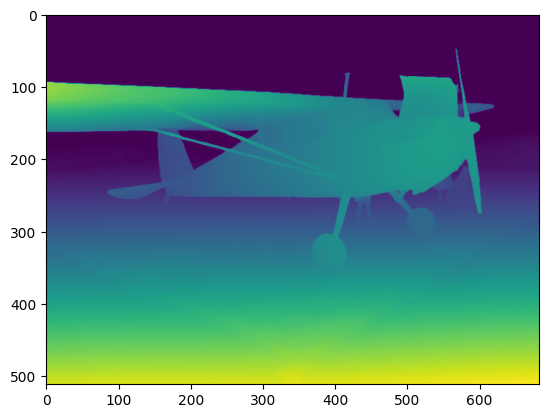

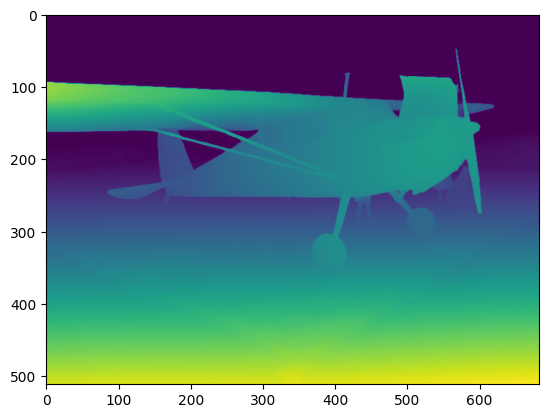

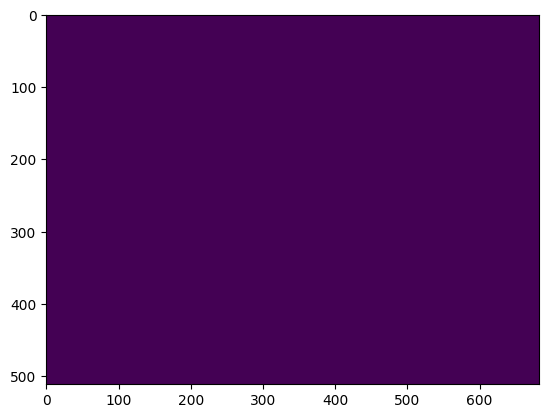

0 0
Refreshing depth estimator
Lazy loading Depth-Anything-V2
DepthAnything-V2 parameters: 335.32M
<KeysViewHDF5 ['min', 'range']>


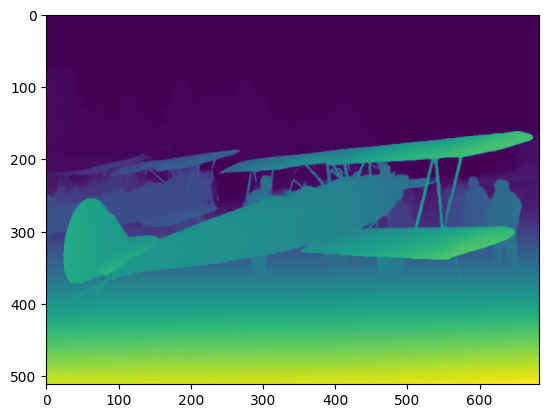

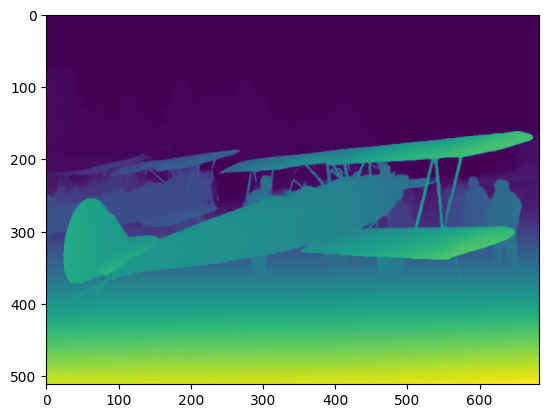

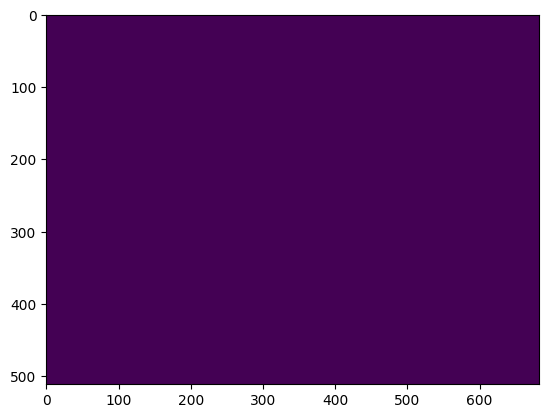

0 0
Refreshing depth estimator
Lazy loading Depth-Anything-V2
DepthAnything-V2 parameters: 335.32M
<KeysViewHDF5 ['min', 'range']>


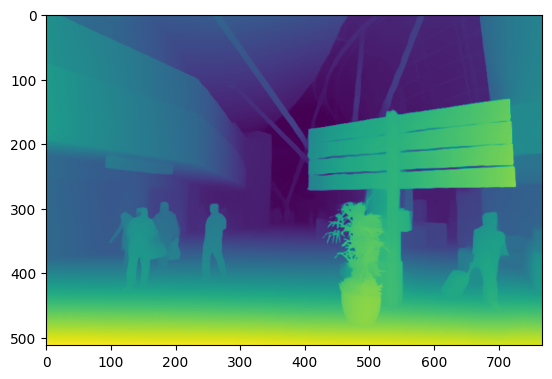

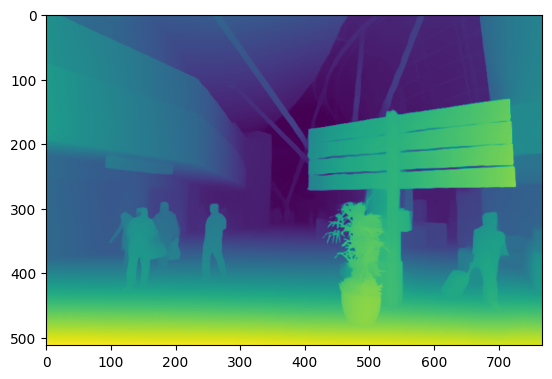

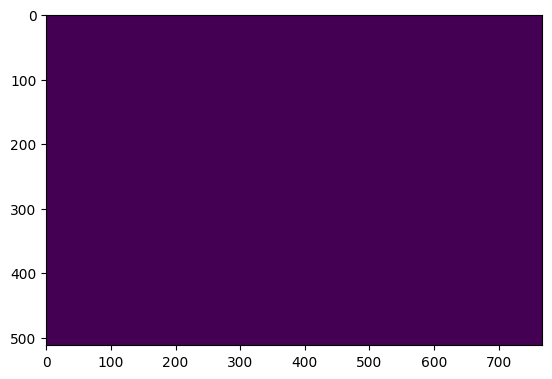

0 0
Refreshing depth estimator
Lazy loading Depth-Anything-V2
DepthAnything-V2 parameters: 335.32M
<KeysViewHDF5 ['min', 'range']>


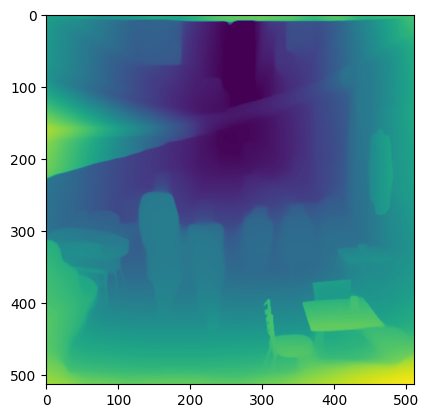

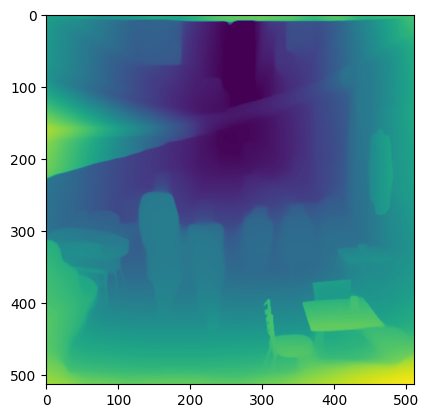

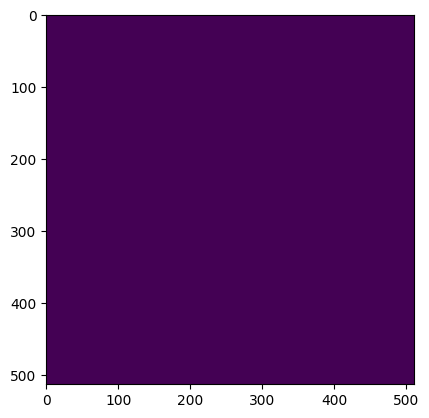

0 0


In [10]:
import numpy as np
import cv2

def fix_broken_dataset(hdf5_file_path, dataset_path, new_depth_map):
    with h5py.File(hdf5_file_path, 'a') as hdf5_file:
        if dataset_path in hdf5_file:
            # Normalize depth map, subtract mean and divide by std
            depth_map_min = np.min(new_depth_map)
            depth_map_range = np.max(new_depth_map) - depth_map_min
            depth_map = (new_depth_map - depth_map_min) / depth_map_range
            depth_map_u16 = (depth_map * 65535).astype(np.uint16)

            # Convert uint16 back to normalized float
            depth_map_normalized = depth_map_u16.astype(np.float32) / 65535.0
            
            # Denormalize to reconstruct the original depth map
            depth_map_reconstructed = depth_map_normalized * depth_map_range + depth_map_min

            # convert to u8
            reconstructed_min = np.min(depth_map_reconstructed)
            reconstructed_range = np.max(depth_map_reconstructed) - reconstructed_min
            depth_map_u8 = (depth_map_reconstructed - reconstructed_min) / reconstructed_range
            depth_map_u8 = (depth_map_u8 * 255).astype(np.uint8)

            print(hdf5_file[dataset_path].attrs.keys())
            plt.imshow(hdf5_file[dataset_path][...])
            plt.show()
            plt.imshow(depth_map_u8)
            plt.show()
            diff_u8s = np.abs(hdf5_file[dataset_path][...] - depth_map_u8)
            plt.imshow(diff_u8s)
            plt.show()
            print(np.min(diff_u8s), np.max(diff_u8s))

            # Save the depth map in the group
            #hdf5_file[dataset_path][...] = depth_map_u8
            #hdf5_file[dataset_path].attrs['min'] = reconstructed_min
            #hdf5_file[dataset_path].attrs['range'] = reconstructed_range


def get_depth_img_from_path(root,dataset_path):
    depth_anything = refresh_depth_estimator()
    filename = f"{root}/{dataset_path}.jpg"
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    depth_map = depth_anything.get_rawdepth(img)
    return depth_map

paths_to_fix = broken_datasets[0]
for path in paths_to_fix:
    fix_broken_dataset(hdf5_path[0], path, get_depth_img_from_path('D:/dev/lama_stereoinpainting/docker/places/places_standard_dataset/train', path))

In [11]:
def count_datasets(file_path):
    dataset_count = 0

    # Open the HDF5 file
    with h5py.File(file_path, 'r') as hdf_file:
        # Recursive function to count datasets
        def count_in_group(group):
            nonlocal dataset_count
            for name, item in group.items():
                if isinstance(item, h5py.Dataset):  # Check if it's a dataset
                    dataset_count += 1
                elif isinstance(item, h5py.Group):  # Recurse into groups
                    count_in_group(item)

        # Start counting from the root group
        count_in_group(hdf_file)

    return dataset_count

for path in hdf5_path:
    print(f"Dataset count in {path}: {count_datasets(path)}")

Dataset count in D:/dev/lama_stereoinpainting/docker/places/depth/train_large_places365standard_disparity_u8.hdf5: 1803460
Dataset count in D:/dev/lama_stereoinpainting/docker/places/depth/val_large_places365standard_disparity_u8.hdf5: 4189
